### appending or concat stacks add rows
joining adds related columns from one dataframe to another based on common values

In [1]:
import pandas as pd 

In [2]:
retail = pd.read_csv("./retail/retail_2016_2017.csv")

In [3]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [4]:
automotive = retail.query("family == 'AUTOMOTIVE'").head()

automotive

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
33,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0
66,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0
99,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0
132,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0


In [10]:
beauty = retail.query("family == 'BEAUTY'").head()

beauty = beauty.assign(new_col = 10)

beauty

,id,date,store_nbr,family,sales,onpromotion,new_col
2,1945946,2016-01-01,1,BEAUTY,0.0,0,10
35,1945979,2016-01-01,10,BEAUTY,0.0,0,10
68,1946012,2016-01-01,11,BEAUTY,0.0,0,10
101,1946045,2016-01-01,12,BEAUTY,0.0,0,10
134,1946078,2016-01-01,13,BEAUTY,0.0,0,10


In [7]:
pd.concat([automotive,beauty],
          ignore_index=True
         )

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0
2,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0
3,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0
4,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0
5,1945946,2016-01-01,1,BEAUTY,0.0,0
6,1945979,2016-01-01,10,BEAUTY,0.0,0
7,1946012,2016-01-01,11,BEAUTY,0.0,0
8,1946045,2016-01-01,12,BEAUTY,0.0,0
9,1946078,2016-01-01,13,BEAUTY,0.0,0


In [9]:
pd.concat([automotive,beauty],
         # ignore_index=True
         ).reset_index()

,index,id,date,store_nbr,family,sales,onpromotion
0,0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,33,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0
2,66,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0
3,99,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0
4,132,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0
5,2,1945946,2016-01-01,1,BEAUTY,0.0,0
6,35,1945979,2016-01-01,10,BEAUTY,0.0,0
7,68,1946012,2016-01-01,11,BEAUTY,0.0,0
8,101,1946045,2016-01-01,12,BEAUTY,0.0,0
9,134,1946078,2016-01-01,13,BEAUTY,0.0,0


In [11]:
pd.concat([automotive,beauty],
         )

,id,date,store_nbr,family,sales,onpromotion,new_col
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,NaN
33,1945977,2016-01-01,10,AUTOMOTIVE,0.0,0,NaN
66,1946010,2016-01-01,11,AUTOMOTIVE,0.0,0,NaN
99,1946043,2016-01-01,12,AUTOMOTIVE,0.0,0,NaN
132,1946076,2016-01-01,13,AUTOMOTIVE,0.0,0,NaN
2,1945946,2016-01-01,1,BEAUTY,0.0,0,10.0
35,1945979,2016-01-01,10,BEAUTY,0.0,0,10.0
68,1946012,2016-01-01,11,BEAUTY,0.0,0,10.0
101,1946045,2016-01-01,12,BEAUTY,0.0,0,10.0
134,1946078,2016-01-01,13,BEAUTY,0.0,0,10.0


### Exercise 1 concatenating dataframes

In [13]:
transactions = pd.concat(
    (pd.read_csv("transactions_2014.csv"),pd.read_csv("transactions_2015.csv"))
).drop(["Unnamed: 0"], axis=1)

transactions.head()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week,year
0,2014-01-01,25,840,0.3360,False,False,1,2,2014
1,2014-01-01,36,487,0.1948,False,False,1,2,2014
2,2014-01-02,1,1875,0.7500,False,False,1,3,2014
3,2014-01-02,2,2122,0.8488,False,False,1,3,2014
4,2014-01-02,3,3350,1.3400,True,False,1,3,2014


In [14]:
transactions.tail()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week,year
18341,2015-12-31,49,3828,1.5312,True,False,12,3,2015
18342,2015-12-31,50,2948,1.1792,True,False,12,3,2015
18343,2015-12-31,51,2892,1.1568,True,False,12,3,2015
18344,2015-12-31,53,2300,0.9200,False,False,12,3,2015
18345,2015-12-31,54,1572,0.6288,False,False,12,3,2015


In [16]:
#excel 
transactions = pd.concat(
    pd.read_excel("TransactionYear.xlsx",sheet_name=[1,2]),
    ignore_index=True
).drop(["Unnamed: 0"], axis=1)

In [17]:
transactions.head()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week,year
0,2014-01-01,25,840,0.3360,False,False,1,2,2014
1,2014-01-01,36,487,0.1948,False,False,1,2,2014
2,2014-01-02,1,1875,0.7500,False,False,1,3,2014
3,2014-01-02,2,2122,0.8488,False,False,1,3,2014
4,2014-01-02,3,3350,1.3400,True,False,1,3,2014


In [18]:
transactions.tail()

,Date,Store_Number,Transaction_Count,target_pct,met_target,bonus_payable,month,day_of_week,year
35479,2015-12-31,49,3828,1.5312,True,False,12,3,2015
35480,2015-12-31,50,2948,1.1792,True,False,12,3,2015
35481,2015-12-31,51,2892,1.1568,True,False,12,3,2015
35482,2015-12-31,53,2300,0.9200,False,False,12,3,2015
35483,2015-12-31,54,1572,0.6288,False,False,12,3,2015


### join dataframes with merge()
left_df.merge(right_df,
              how,
              left_on,
              right_on)

inner , left, right and outer              

In [20]:
transactions = pd.read_csv("./retail/transactions.csv", parse_dates=["date"])

In [21]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [22]:
oil = pd.read_csv("./retail/oil.csv", parse_dates=["date"])

In [23]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [24]:
transactions.merge(oil)

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25,770,NaN
1,2013-01-02,1,2111,93.14
2,2013-01-02,2,2358,93.14
3,2013-01-02,3,3487,93.14
4,2013-01-02,4,1922,93.14
...,...,...,...,...
59646,2017-08-15,50,2804,47.57
59647,2017-08-15,51,1573,47.57
59648,2017-08-15,52,2255,47.57
59649,2017-08-15,53,932,47.57


In [29]:
transactions.merge(oil,
                  how="inner",
                  left_on =["date"],
                  right_on = ["date"]
                 # on=["date"] 
                  )#.loc[transactions["date"] == '2013-01-06']

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25,770,NaN
1,2013-01-02,1,2111,93.14
2,2013-01-02,2,2358,93.14
3,2013-01-02,3,3487,93.14
4,2013-01-02,4,1922,93.14
...,...,...,...,...
59646,2017-08-15,50,2804,47.57
59647,2017-08-15,51,1573,47.57
59648,2017-08-15,52,2255,47.57
59649,2017-08-15,53,932,47.57


In [28]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [30]:
# left join 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [31]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [34]:
transactions.merge(oil,
                  how="left",
                  left_on = ["date"],
                  right_on = ["date"]
                 ).loc[transactions["date"] == '2013-01-06']

,date,store_nbr,transactions,dcoilwtico
185,2013-01-06,1,520,NaN
186,2013-01-06,2,1992,NaN
187,2013-01-06,3,3590,NaN
188,2013-01-06,4,1891,NaN
189,2013-01-06,5,1754,NaN
190,2013-01-06,6,2313,NaN
191,2013-01-06,7,1431,NaN
192,2013-01-06,8,2748,NaN
193,2013-01-06,9,2635,NaN
194,2013-01-06,10,1173,NaN


In [35]:
transactions.merge(oil,
                  how="outer",
                  left_on = ["date"],
                  right_on = ["date"]
                 )#.loc[transactions["date"] == '2013-01-06']

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25.0,770.0,NaN
1,2013-01-02,1.0,2111.0,93.14
2,2013-01-02,2.0,2358.0,93.14
3,2013-01-02,3.0,3487.0,93.14
4,2013-01-02,4.0,1922.0,93.14
...,...,...,...,...
83499,2017-08-25,NaN,NaN,47.65
83500,2017-08-28,NaN,NaN,46.40
83501,2017-08-29,NaN,NaN,46.46
83502,2017-08-30,NaN,NaN,45.96


In [36]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


### Exercise 2 joins 

- join retail and stores
- plot total sales by city
- the sum of sales by "type" over time
- and stacked bar chart with average daily sales by type by month with "type" as the stacks 

In [37]:
retail = pd.read_csv("./retail/retail_2016_2017.csv", parse_dates=["date"])
stores = pd.read_csv("./retail/stores.csv")

In [38]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [40]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [42]:
new_df = retail.merge(stores,
            how='inner',
            left_on = ["store_nbr"],
            right_on = ["store_nbr"])

In [45]:
new_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13
1,1945945,2016-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13
2,1945946,2016-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13
4,1945948,2016-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13


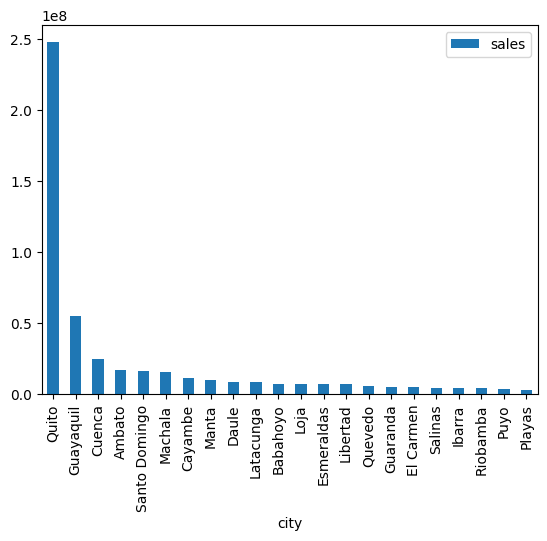

In [75]:
(new_df
       .groupby(["city"])
       .agg({"sales" :"sum"})
       .sort_values(by="sales", ascending=False)
       .plot.bar()
) ;      



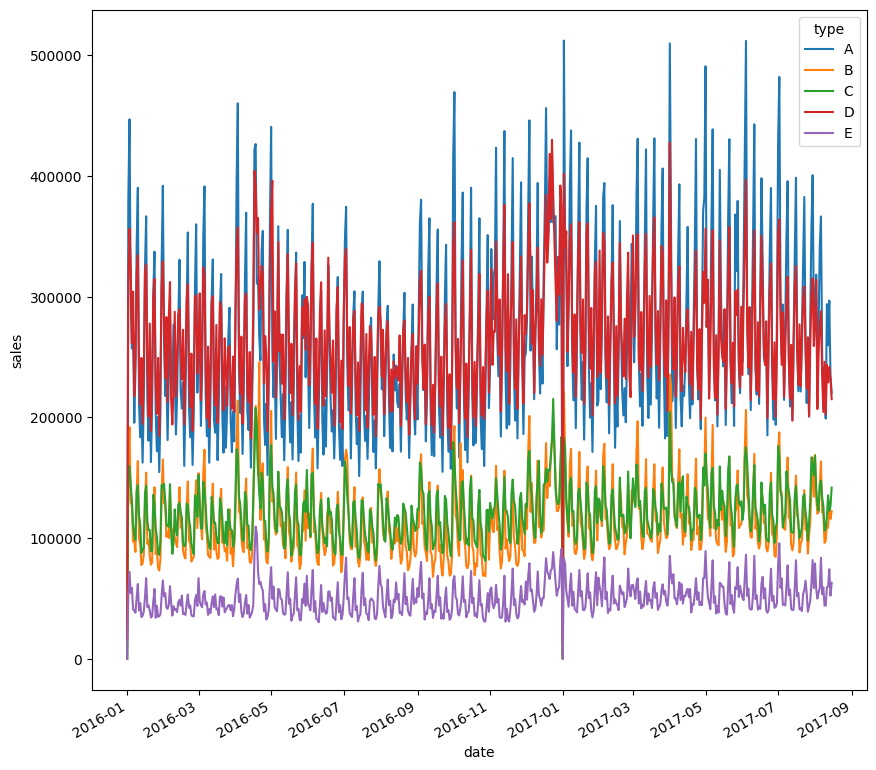

In [76]:

(new_df.pivot_table(index="date",columns=["type"], values = "sales", aggfunc="sum")
       .plot(
           xlabel="date",
          ylabel="sales",
          figsize=(10,10)
         # cmap='tab10',
          #alpha=0.4
           
       )
);

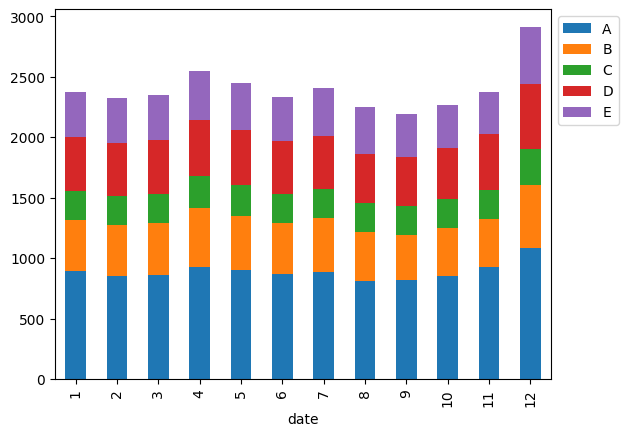

In [74]:
(new_df.pivot_table(
    index="type",columns=new_df["date"].dt.month, values = "sales", aggfunc="mean")
       .T.plot.bar(stacked=True).legend(bbox_to_anchor=(1,1))
);